In [21]:
# STEP 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [23]:
# STEP 2: Load and Preprocess the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1]

# Class names for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

C:\Users\anuja\AppData\Local\Temp\ipykernel_17864\2630688277.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


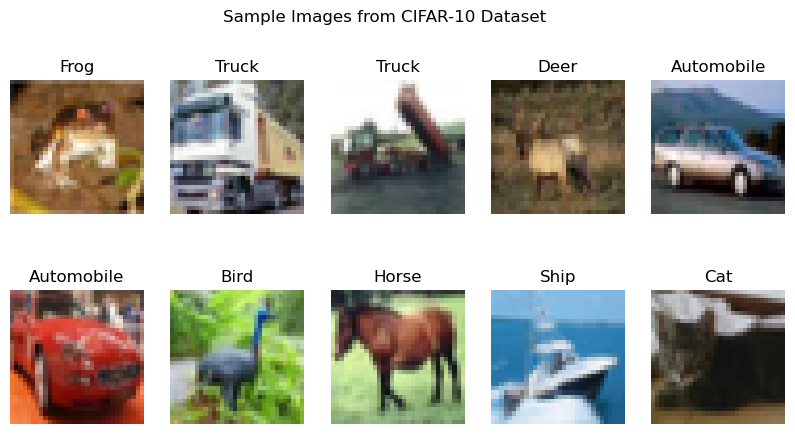

In [25]:
# STEP 3: Visualize Sample Images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.show()

In [27]:
# STEP 4: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

In [31]:
# STEP 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
# STEP 6: Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.4459 - loss: 1.5183 - val_accuracy: 0.5615 - val_loss: 1.2202
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5958 - loss: 1.1435 - val_accuracy: 0.6180 - val_loss: 1.0789
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.6530 - loss: 0.9893 - val_accuracy: 0.6635 - val_loss: 0.9713
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6913 - loss: 0.8839 - val_accuracy: 0.6847 - val_loss: 0.9071
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 31ms/step - accuracy: 0.7180 - loss: 0.8098 - val_accuracy: 0.6898 - val_loss: 0.8879
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.7379 - loss: 0.7490 - val_accuracy: 0.7032 - val_loss: 0.8610
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.7543 - loss: 0.6998 - val_accuracy: 0.7042 - val_loss: 0.8584
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7710 -

In [35]:
# STEP 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7112 - loss: 0.8886

✅ Test Accuracy: 0.71


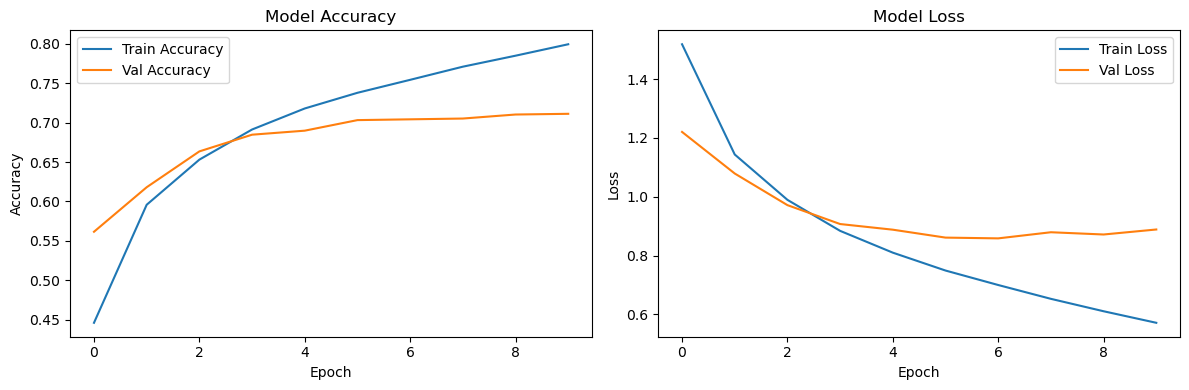

In [43]:
# STEP 8: Visualize Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


C:\Users\anuja\AppData\Local\Temp\ipykernel_17864\3192564778.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(y_test[i])]} \nPred: {class_names[y_pred_classes[i]]}")


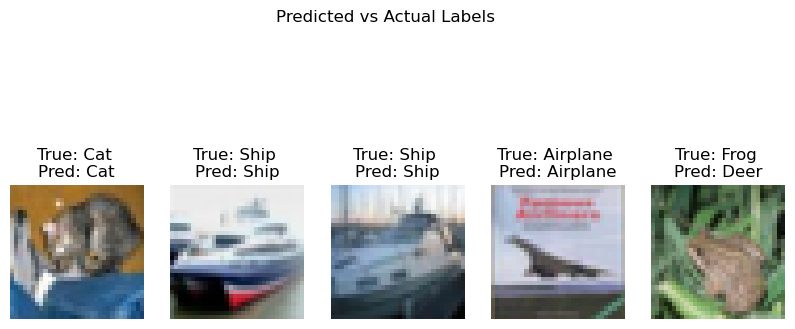

In [45]:
# STEP 9: Predict and Visualize Results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Show 5 predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[int(y_test[i])]} \nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.suptitle("Predicted vs Actual Labels")
plt.show()
